## Plotting Vectors and Vector Fields

### 1) The electric field of a point charge in 2D

Consider an isolated proton. Coulomb's Law says that it generates an electric field:

$$\vec{E}(\vec{r}) = k\frac{q}{r^2}\hat{r}$$

where $q = e = 1.602\times 10^{-19}$ Coulombs is the charge of the proton in S.I. units, $k = 8.988\times10^9$ N$\,$m$^2\,$C$^{-2}$ is the Coulomb constant, $r = |\vec{r}|$ is the norm of the separation vector, and $\hat{r}$ is a unit vector in the $\vec{r}$-direction.
Note that since $\hat{r} = \vec{r}/r$, we can also write this as:

$$\vec{E}(\vec{r}) = k\frac{q}{r^3}\vec{r}$$

Note $\vec{E}$ is what is called a *vector field*, that is a function that associates a vector to every point in space.

Make a plot showing the electric field, as arrows with some appropriate scaling, at various points around a proton located at the origin. (For simplicity you can restrict yourself to a 2D plane)

Some steps are:

   a) pick units and a/or a picture size; this can be any value really
    
   b) given the picture size, pick a scaling for the field, such that the arrows fit sensibly on the plot.

   c) pick a set of points at which to calculate and plot the field
    
   d) draw arrows from those points in the correct direction, using the pyplot function arrow
    
   e) if you want you can figure out how to add a circle, a plus sign and or "e" beside the charge, a scale bar, etc.


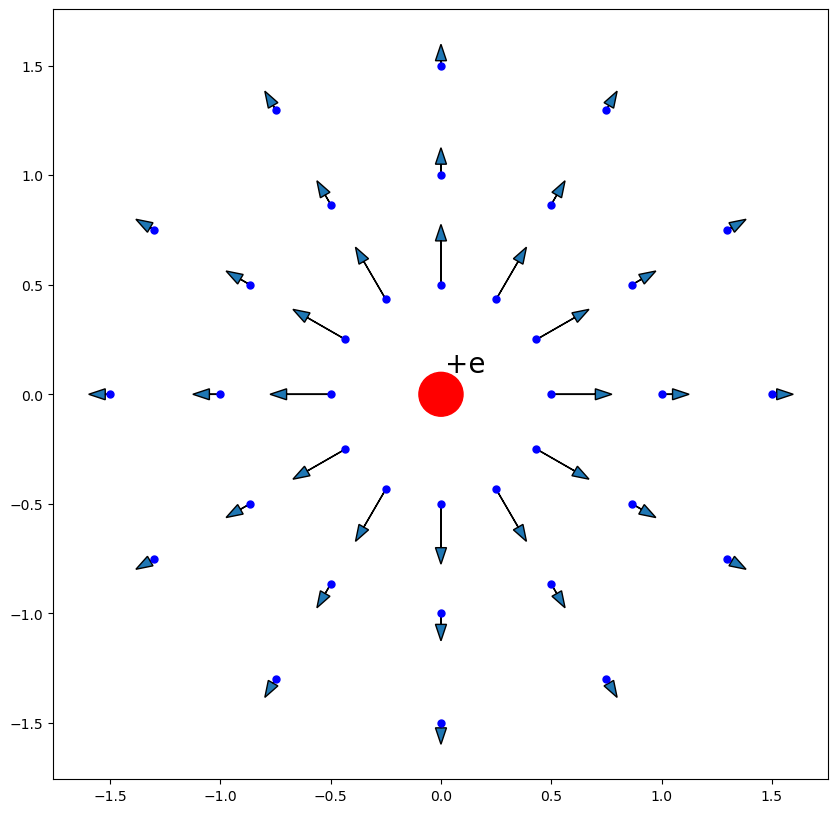

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sin, cos, sqrt
plt.rcParams['figure.figsize'] = [10,10]

#b
kq=0.05

#c
x = []
y = []

for r in np.arange(0.5,2.0,0.5):
    for theta in np.arange(0.0,1.99*pi,pi/6.0):
        xv = r*cos(theta)
        yv = r*sin(theta)
        x.append(xv)
        y.append(yv)
        rp = sqrt(xv*xv+yv*yv)
        dx = xv*kq/rp/rp/rp
        dy = yv*kq/rp/rp/rp
        plt.arrow(xv,yv,dx,dy,head_width=0.05)
plt.plot(x,y,'bo',markersize=5)
# plt.show()

ax = plt.gca()
crc = plt.Circle((0,0),0.1,color='red')
ax.add_artist(crc)
ax.text(0.02,0.1,r'+e',fontsize=20)
plt.show()

### 2) The gravitational field of the Earth-Moon System in 2D

The expression for the acceleration, or "gravitational" field produced by the Earth is similar to Coulomb's law:

$$g_E(\vec{r}) = -G\frac{M_E}{r^2}\hat{r}$$

where $G = 6.67 \times 10^{-11}$ N$\,$kg$^{-2}$m$^2$ is Newton's constant, $M_E = 5.972 \times 10^{24}$ kg is the mass of the Earth, and $\vec{r}$ is the position vector, as before.

For the Moon, the expression for the field $g_M$ is similar, with the mass of the Moon $M_M = 7.35\times10^{22}$ kg substituted for the Mass of the Eath, and $\vec{r}$ now indicating the position with respect to the Moon.

Make a plot showing the gravitational field of the combined Earth-Moon system, 

$$g_{tot}(\vec{r}) = g_E(\vec{r}-\vec{r}_E) + g_E(\vec{r}-\vec{r}_M)\,.$$

The easiest way to do this is to calculate the Earth field and the Moon field separately, (similarly to the Coulomb field in question 1, but now with different centres for the two fields) and then add the two component-wise.

You will need to pick a scale for your plot and for the Earth-Moon distance, 384400 km, and also a scale for your arrows (i.e. decide what the value of $GM_E$ will be, given your choice of length scale).

Note we should scale by the Moon-Earth mass ratio which is 7.35/597.2 = 0.0012; let's take a larger ratio, e.g. 0.3, for clarity.

Also close to the Earth or the Moon, the vectors will get really big, so I have put in a condition to only plot if we are more than 0.2 distance units away from both.


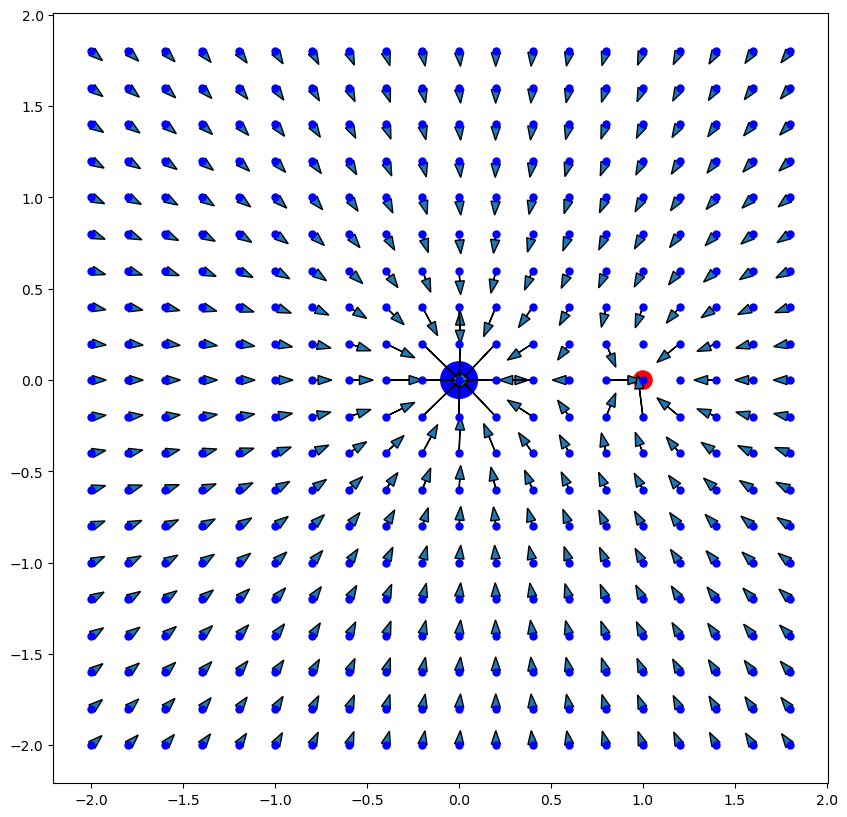

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sin, cos, sqrt

GM = 0.02
mratio = 0.3

plt.rcParams['figure.figsize'] = [10,10]

ax = plt.gca()
cE = plt.Circle((0,0),0.1,color='b')
cM = plt.Circle((1,0),0.05,color='r')
ax.add_artist(cE)
ax.add_artist(cM)

x_1 = []
y_1 = []

for xv in np.arange(-2.0,2.0,0.2):
    for yv in np.arange(-2.0,2.0,0.2):
        x_1.append(xv)
        y_1.append(yv)
        xm = xv - 1.0
        ym = yv
        rE = sqrt(xv*xv+yv*yv)
        rM = sqrt(xm*xm+ym*ym)
        dxE = -xv*GM/rE/rE/rE
        dyE = -yv*GM/rE/rE/rE
        dxM = -xm*mratio*GM/rM/rM/rM
        dyM = -ym*mratio*GM/rM/rM/rM
        dx = dxE + dxM
        dy = dyE + dyM
        if rE>0.2 and rM>0.2:
            plt.arrow(xv,yv,dx,dy,head_width=0.05)
plt.plot(x_1,y_1,'bo',markersize=5)

plt.show()